In [6]:
import pandas as pd #Library to handle with dataframes
import matplotlib.pyplot as plt # Library to plot graphics
import numpy as np # To handle with matrices
import seaborn as sns # to build modern graphics
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats

In [7]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [10]:
# Importing our dataset in variable df_wine1
df_wine1 = pd.read_csv('input/winemag-data-130k-v2.csv')

In [11]:
resumetable(df_wine1)

Dataset Shape: (129971, 14)


Name   dtypes  Missing  Uniques  \
0              Unnamed: 0    int64        0   129971   
1                 country   object       63       43   
2             description   object        0   119955   
3             designation   object    37465    37979   
4                  points    int64        0       21   
5                   price  float64     8996      390   
6                province   object       63      425   
7                region_1   object    21247     1229   
8                region_2   object    79460       17   
9             taster_name   object    26244       19   
10  taster_twitter_handle   object    31213       15   
11                  title   object        0   118840   
12                variety   object        1      707   
13                 winery   object        0    16757   

                                          First Value  \
0                                                   0   
1                                               Italy   
2   Aromas include tropical fruit, broom, brimston...   
3                                        Vulkà Bianco   
4                                                  87   
5                                                 NaN   
6                                   Sicily & Sardinia   
7                                                Etna   
8                                                 NaN   
9                                       Kerin O’Keefe   
10                                       @kerinokeefe   
11                  Nicosia 2013 Vulkà Bianco  (Etna)   
12                                        White Blend   
13                                            Nicosia   

                                         Second Value  \
0                                                   1   
1                                            Portugal   
2   This is ripe and fruity, a wine that is smooth...   
3                                            Avidagos   
4                                                  87   
5                                                15.0   
6                                               Douro   
7                                                 NaN   
8                                                 NaN   
9                                          Roger Voss   
10                                         @vossroger   
11      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
12                                     Portuguese Red   
13                                Quinta dos Avidagos   

                                          Third Value  Entropy  
0                                                   2    16.99  
1                                                  US     2.77  
2   Tart and snappy, the flavors of lime flesh and...    16.83  
3                                                 NaN    13.83  
4                                                  87     3.64  
5                                                14.0     5.77  
6                                              Oregon     5.05  
7                                   Willamette Valley     7.89  
8                                   Willamette Valley     3.28  
9                                        Paul Gregutt     3.39  
10                                        @paulgwine      3.23  
11      Rainstorm 2013 Pinot Gris (Willamette Valley)    16.81  
12                                         Pinot Gris     5.67  
13                                          Rainstorm    12.98

In [12]:
# The function describe is focused on numerical features
# in this case are points and price
print("Statistics of numerical data: ")
print(df_wine1.describe())

Statistics of numerical data: 
          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000


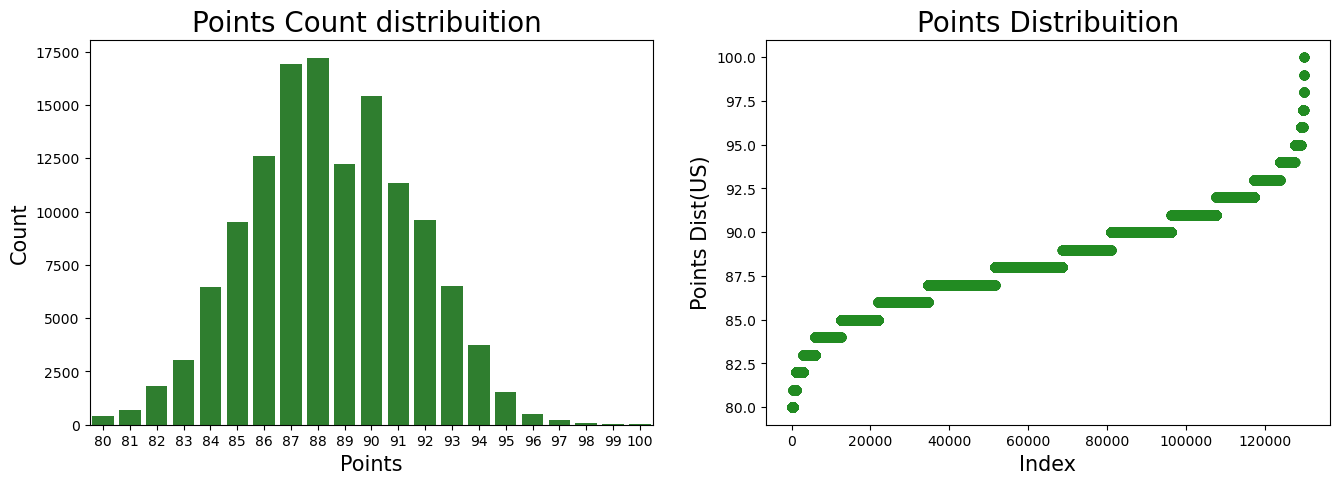

In [13]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=df_wine1, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df_wine1.shape[0]), np.sort(df_wine1.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

In [14]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df_wine1["rating_cat"] = df_wine1["points"].apply(cat_points)

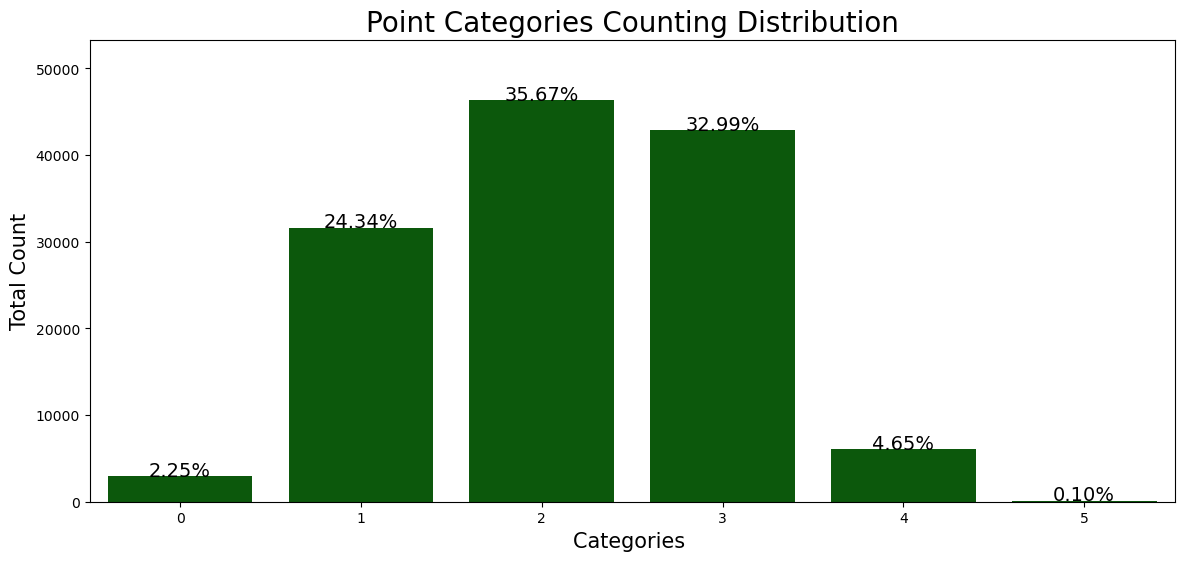

In [15]:
total = len(df_wine1)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df_wine1)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [16]:
CalcOutliers(df_wine1['points'])

Identified lowest outliers: 0
Identified upper outliers: 129
Identified outliers: 129
Non-outlier observations: 129842
Total percentual of Outliers:  0.0994


In [17]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df_wine1['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df_wine1.shape[0]), np.sort(df_wine1.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

C:\Users\SC\AppData\Local\Temp\ipykernel_15516\2424792148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(np.log(df_wine1['price'].dropna() + 1),
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [18]:
CalcOutliers(df_wine1['price'])

Identified lowest outliers: 0
Identified upper outliers: 1177
Identified outliers: 1177
Non-outlier observations: 119798
Total percentual of Outliers:  0.9825


In [19]:
plt.figure(figsize=(12,5))

g = sns.distplot(df_wine1[df_wine1['price'] < 300]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

C:\Users\SC\AppData\Local\Temp\ipykernel_15516\611959153.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_wine1[df_wine1['price'] < 300]['price'], color='darkgreen')
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [20]:
# Let's get tehe price_log to better work with this feature
df_wine1['price_log'] = np.log(df_wine1['price'])

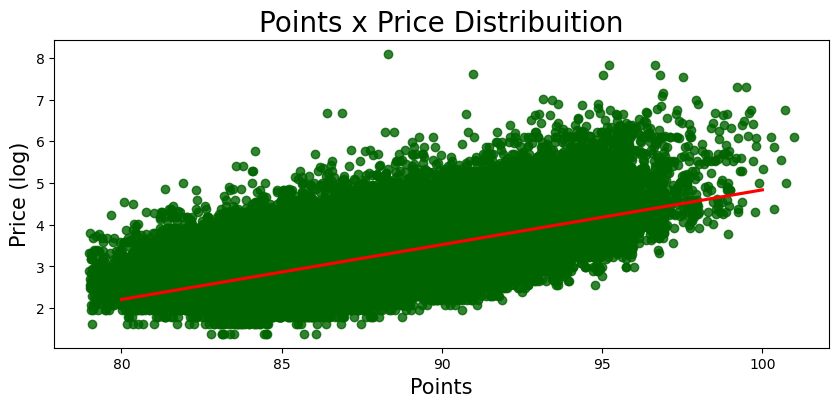

In [21]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df_wine1, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

In [22]:
plt.figure(figsize=(14,6))

country = df_wine1.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df_wine1[df_wine1.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

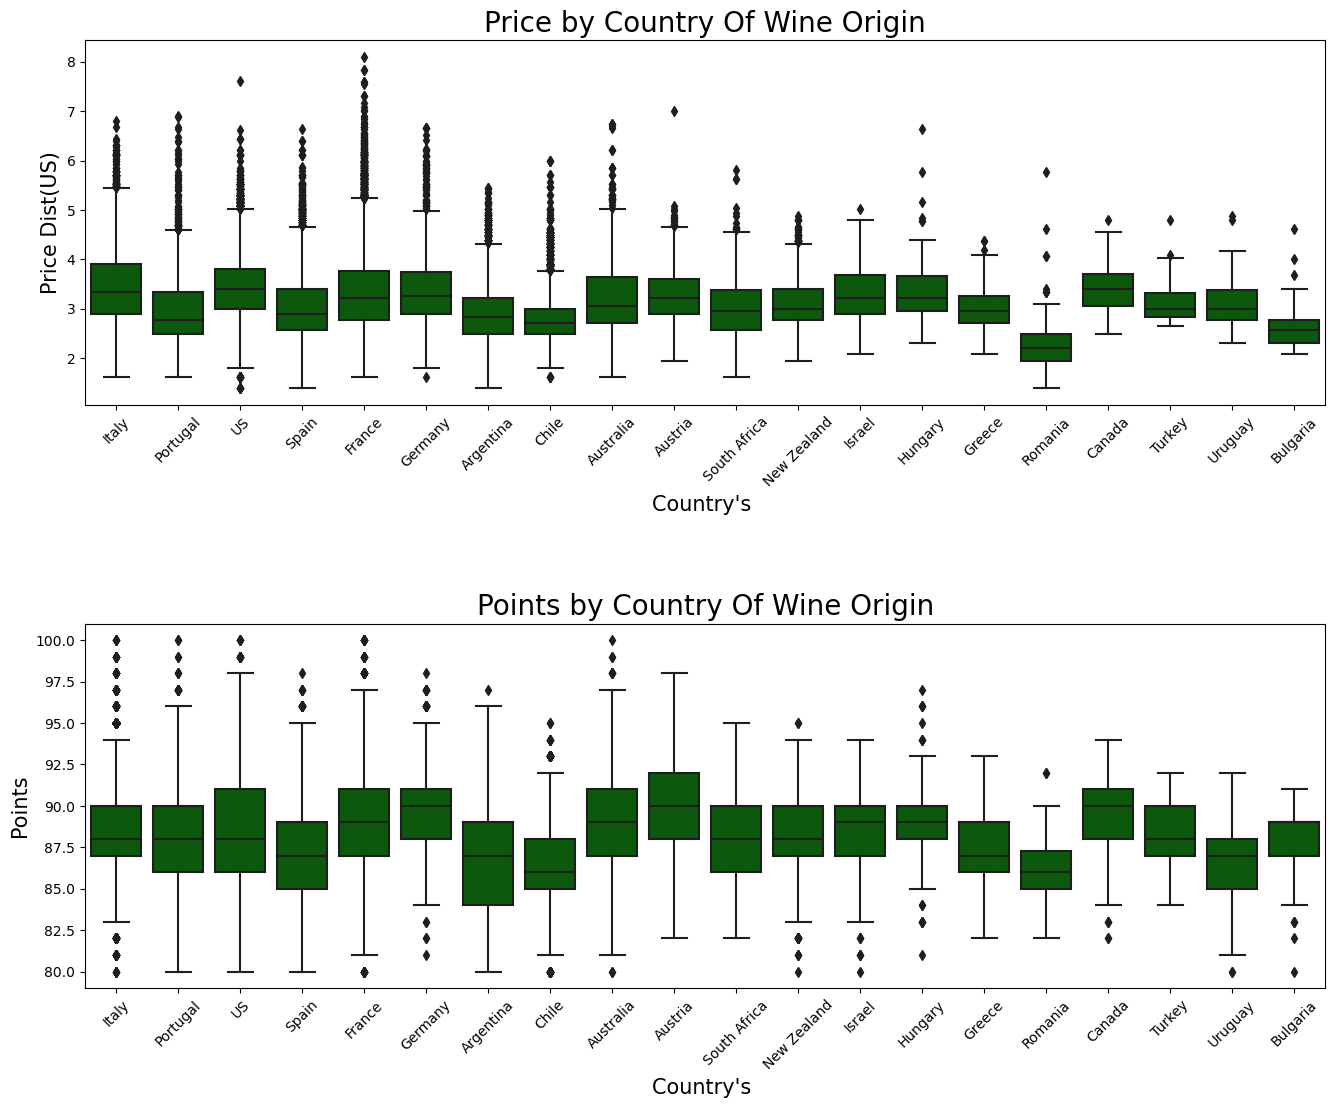

In [23]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df_wine1.loc[(df_wine1.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df_wine1[df_wine1.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

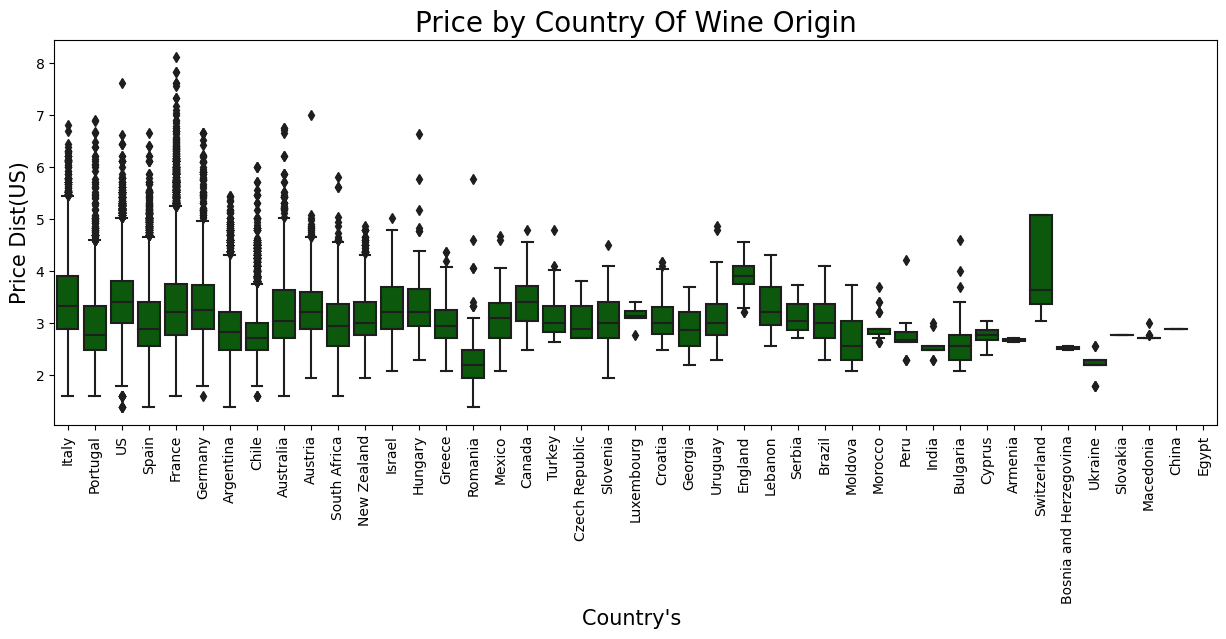

In [24]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen',
                  data=df_wine1)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

In [25]:
plt.figure(figsize=(14,15))

provinces = df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='province', 
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))], 
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))], 
                  color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))], 
                  color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()


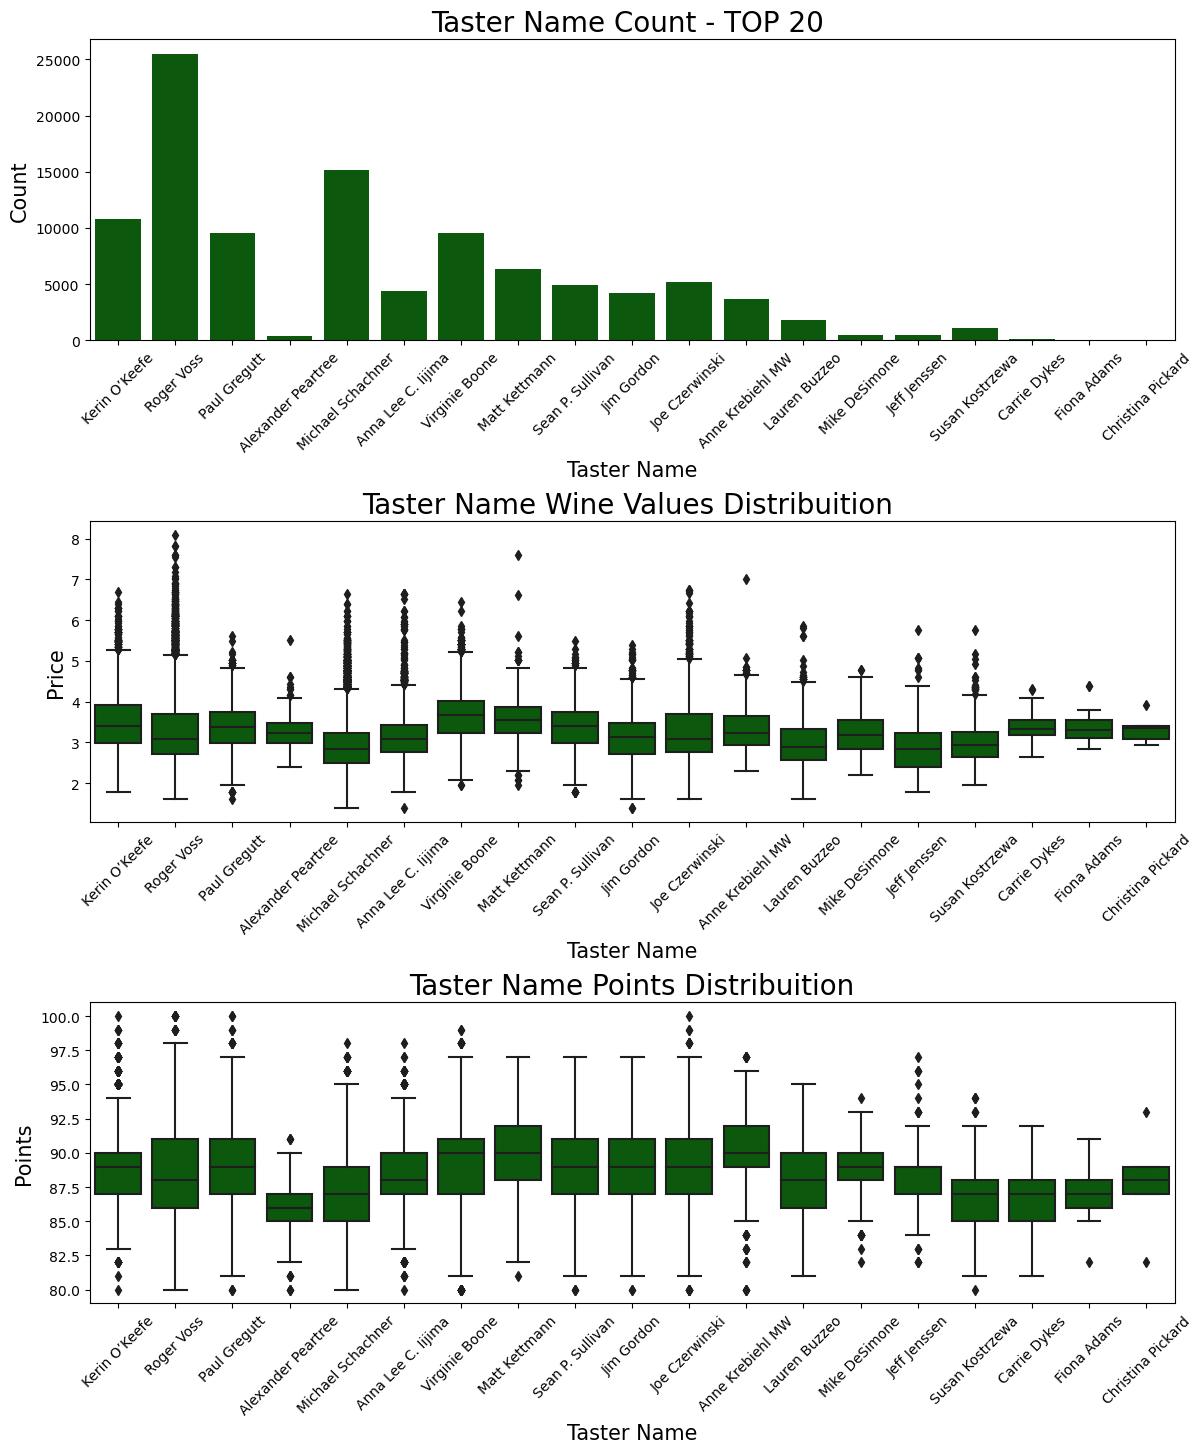

In [26]:
plt.figure(figsize=(14,16))

provinces = df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='taster_name', data=df_wine1, color='darkgreen')
g.set_title("Taster Name Count - TOP 20 ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='taster_name', data=df_wine1, 
                 color='darkgreen')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='taster_name',
                  data=df_wine1, color='darkgreen')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

In [27]:
plt.figure(figsize=(14,16))

designation = df_wine1.designation.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='designation', 
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))], 
                 color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))], 
                 color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

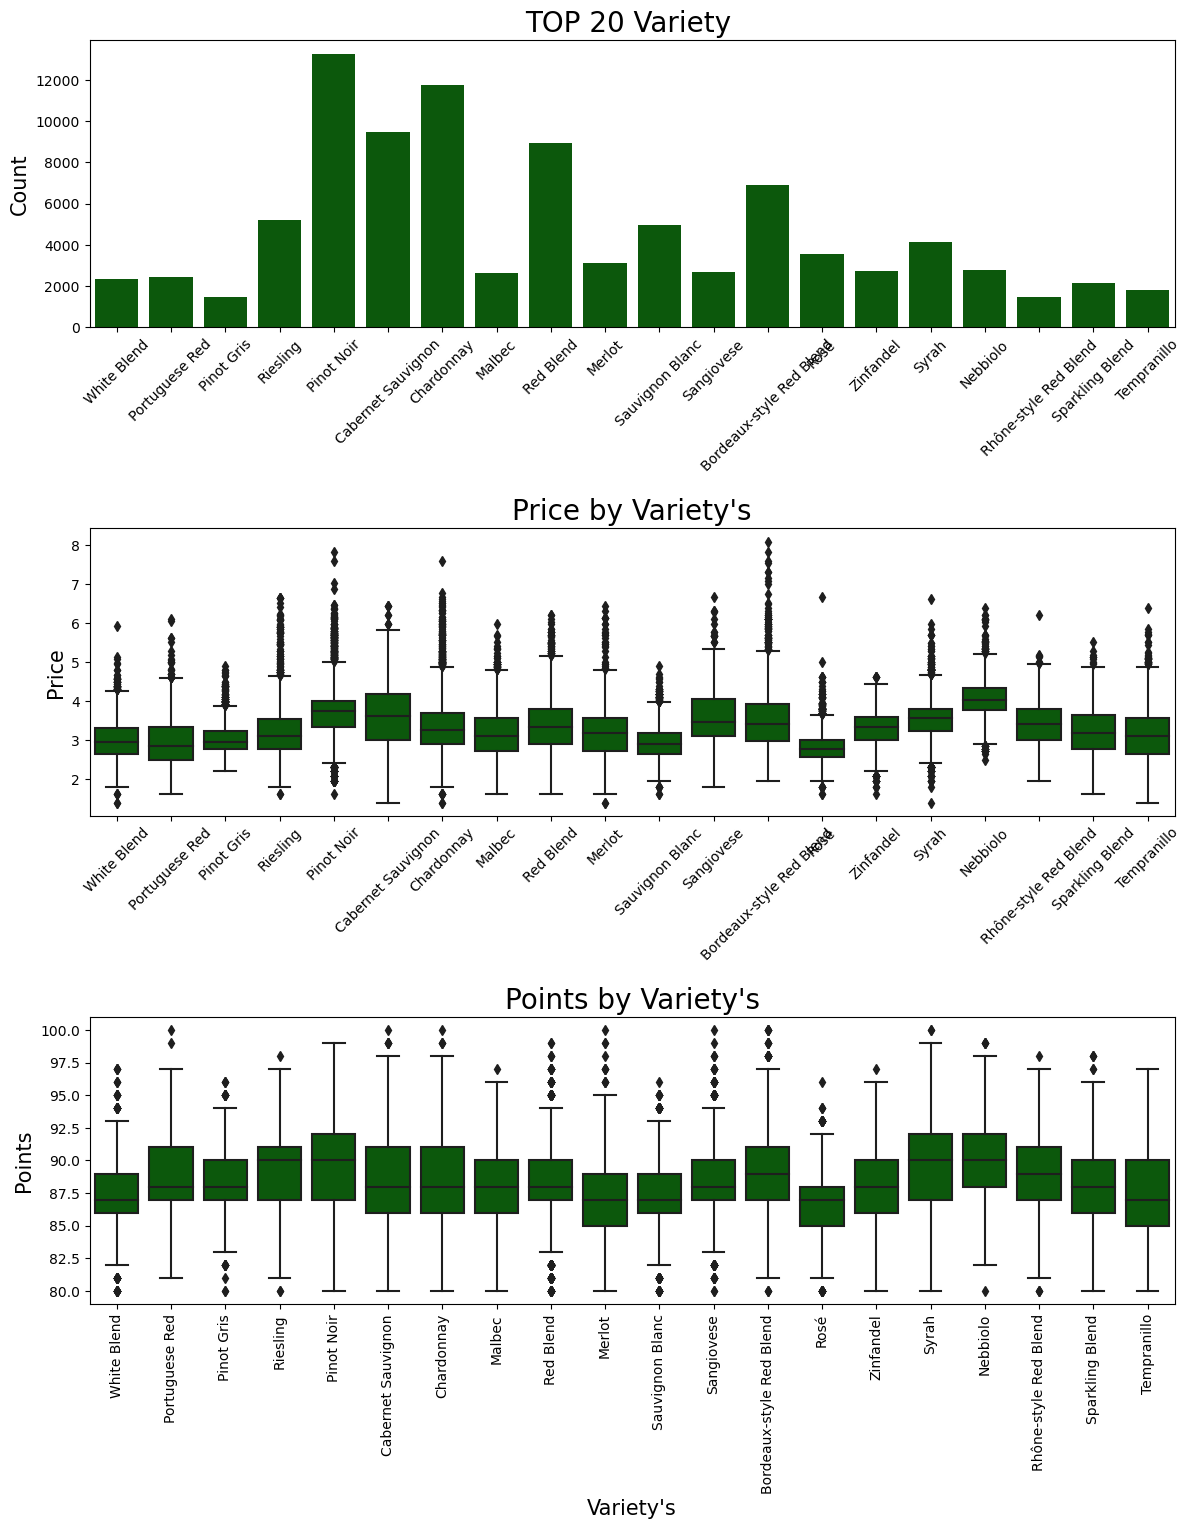

In [28]:
plt.figure(figsize=(14,16))

variety = df_wine1.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))], 
                 color='darkgreen')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))], 
                 color='darkgreen')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

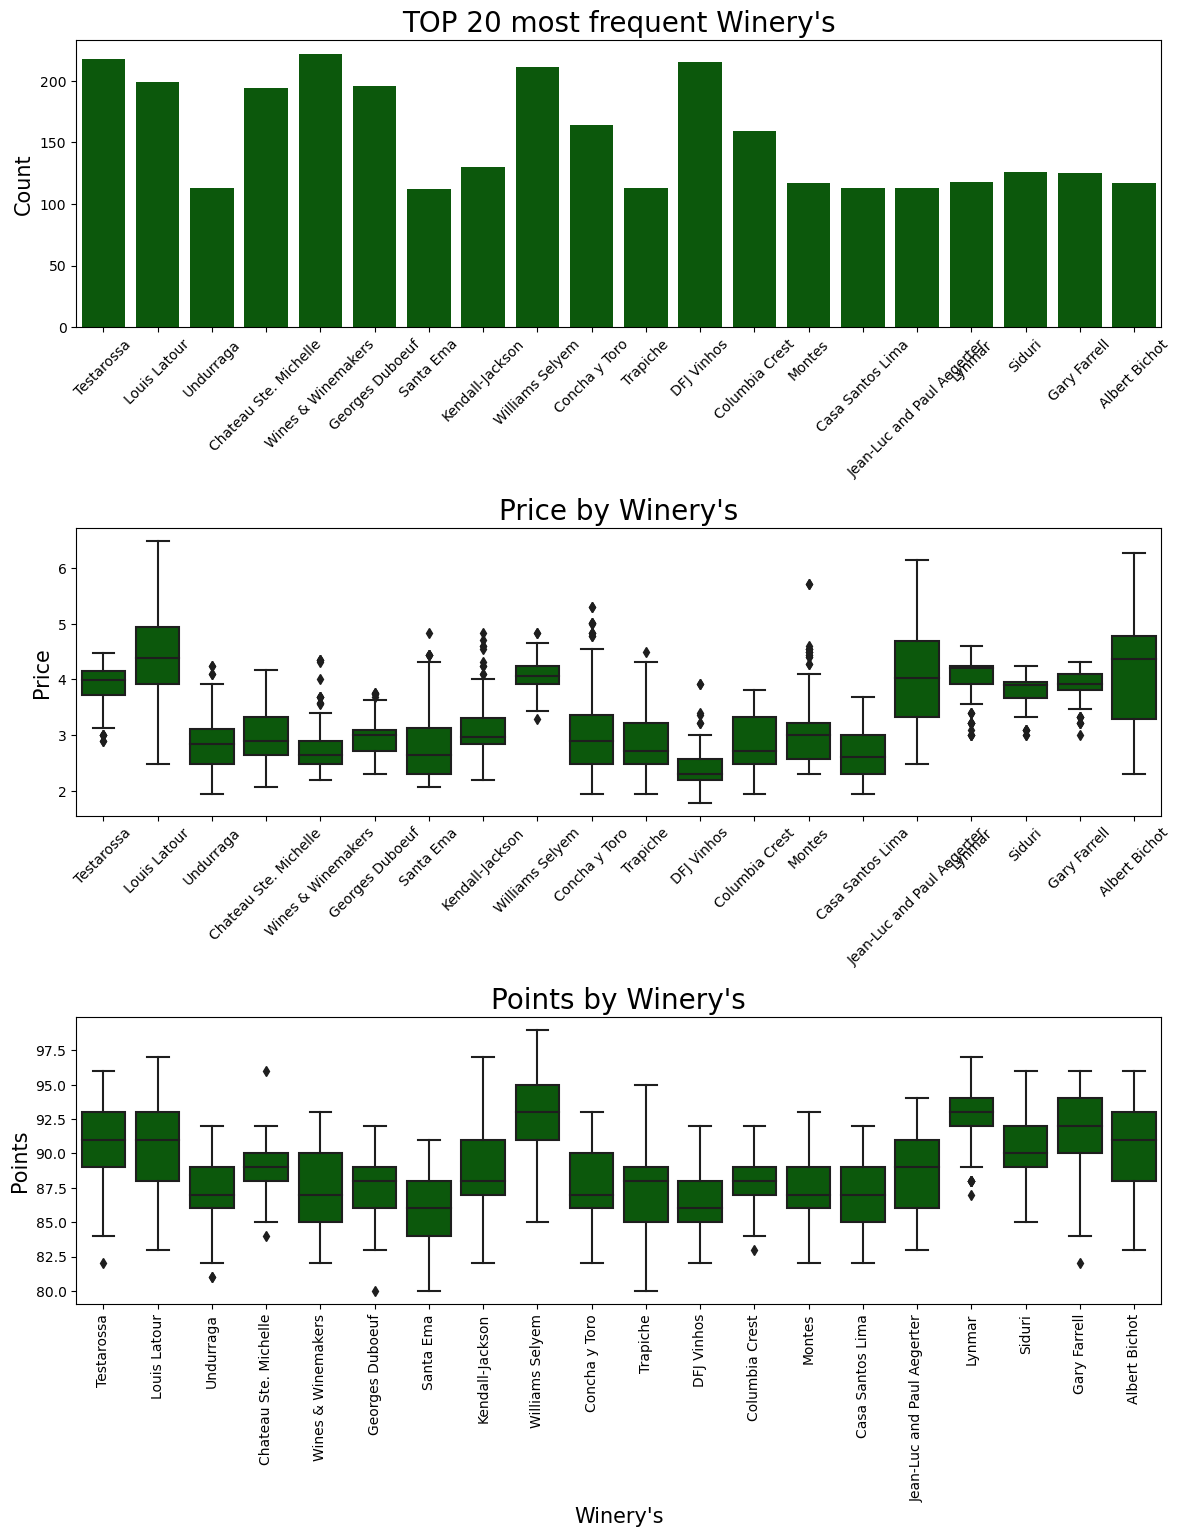

In [29]:
plt.figure(figsize=(14,16))

winery = df_wine1.winery.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='winery', 
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                 color='darkgreen')
g1.set_title("Price by Winery's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                 color='darkgreen')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

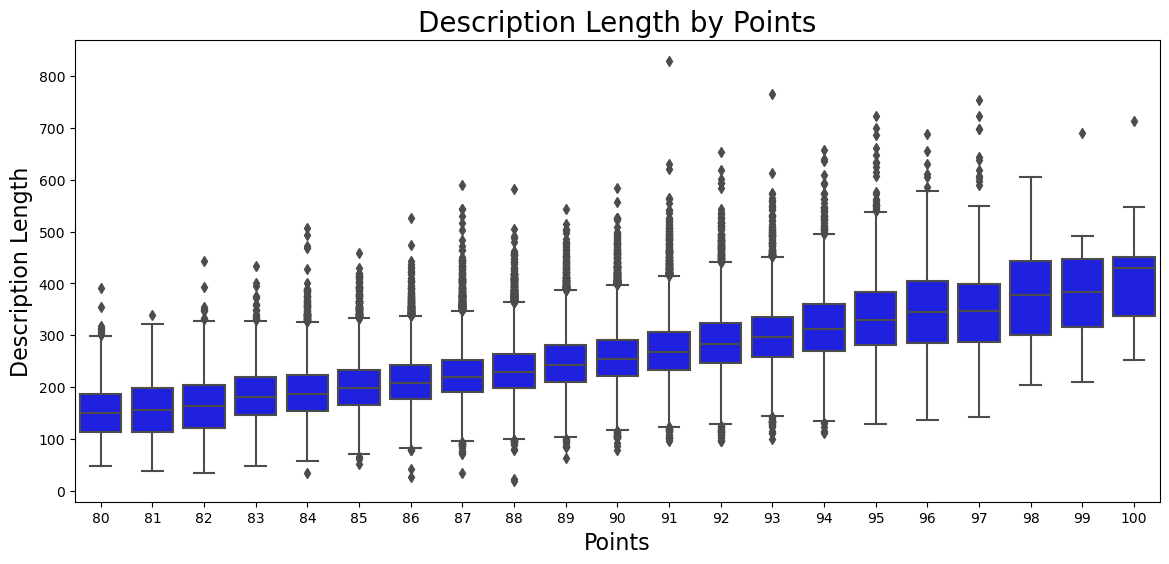

In [31]:
df_wine1 = df_wine1.assign(desc_length = df_wine1['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=df_wine1,
                color='blue')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

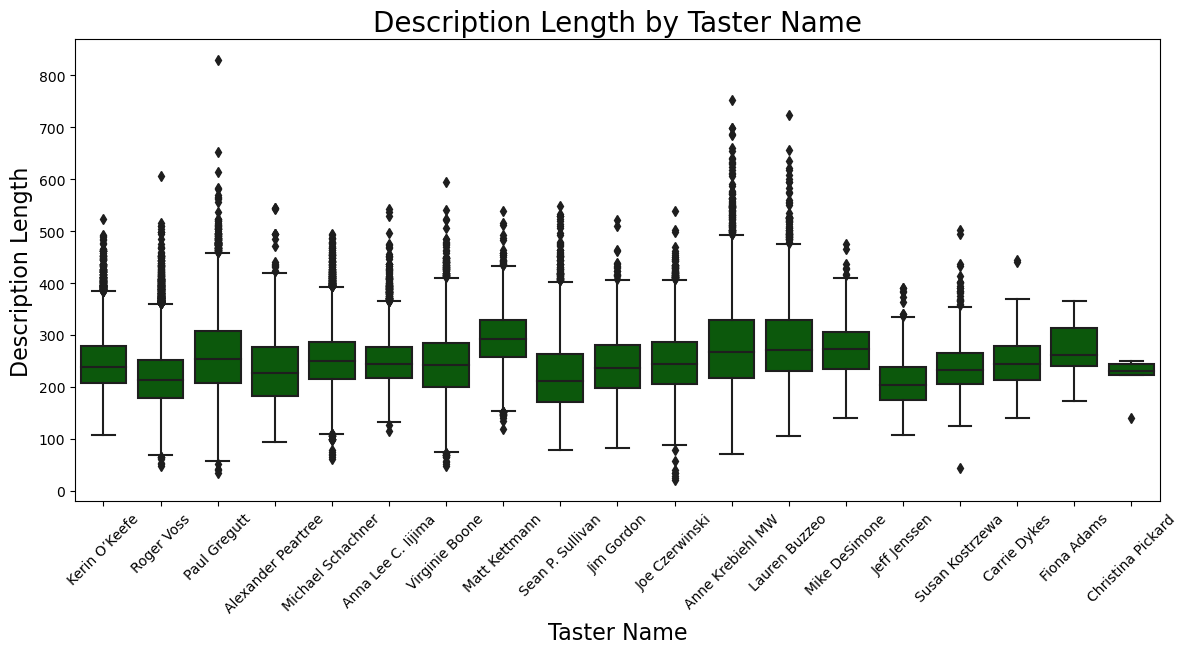

In [32]:
plt.figure(figsize=(14,6))

g = sns.boxplot(x='taster_name', y='desc_length', 
                data=df_wine1, color='darkgreen')
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Taster Name', fontsize = 16) # X label
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

C:\Users\SC\AppData\Local\Temp\ipykernel_15516\2298193805.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


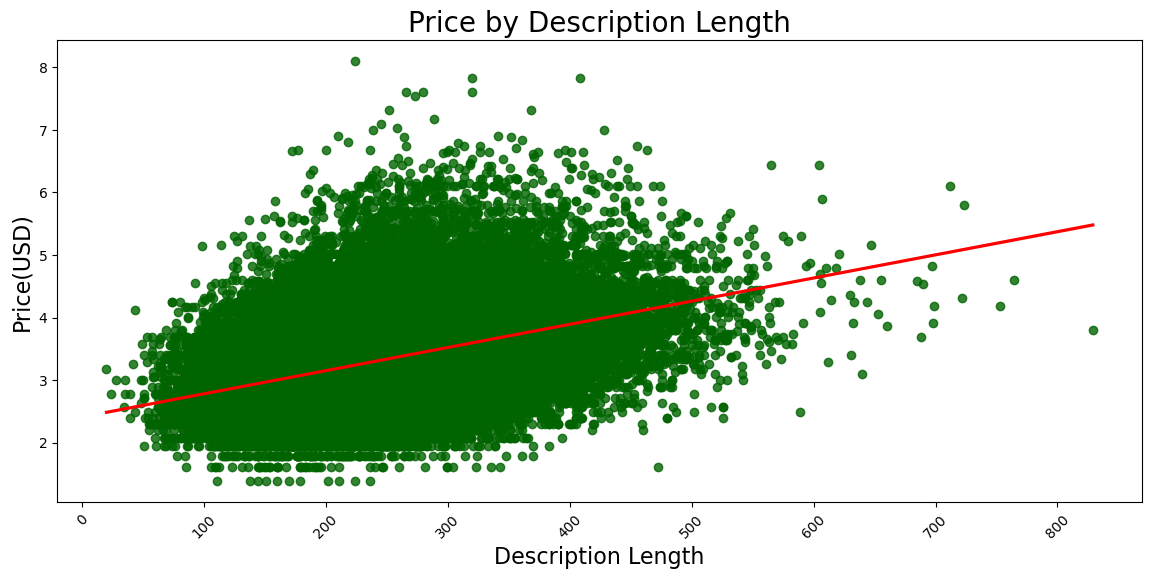

In [33]:
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='price_log', line_kws={'color':'red'},
                data=df_wine1, fit_reg=True, color='darkgreen', )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

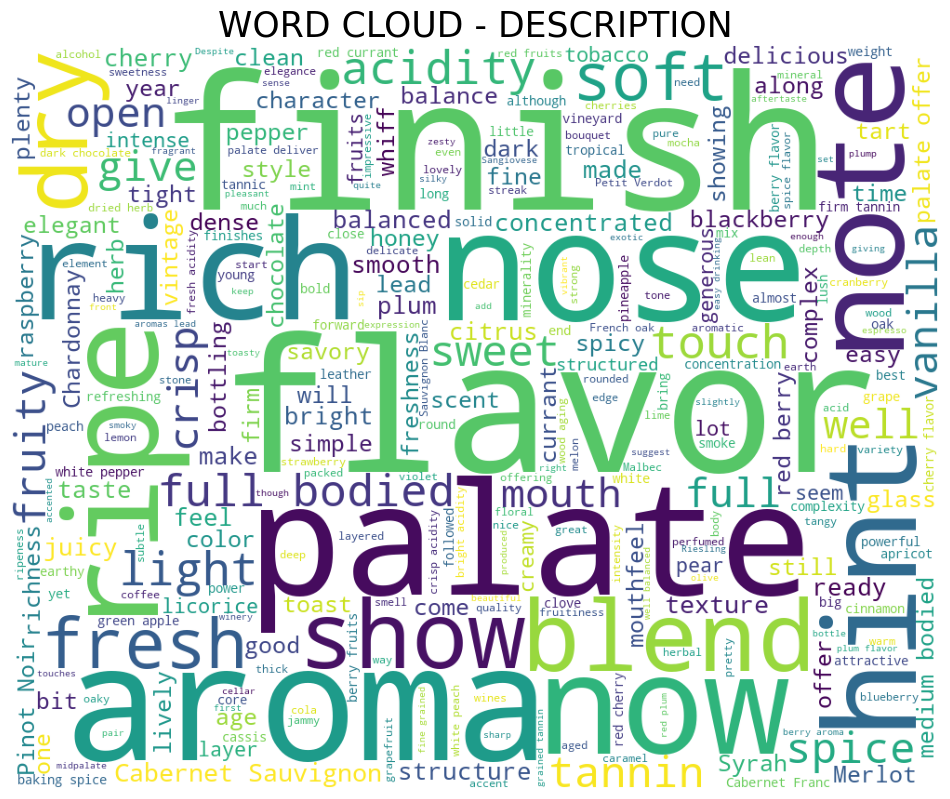

In [35]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_wine1['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

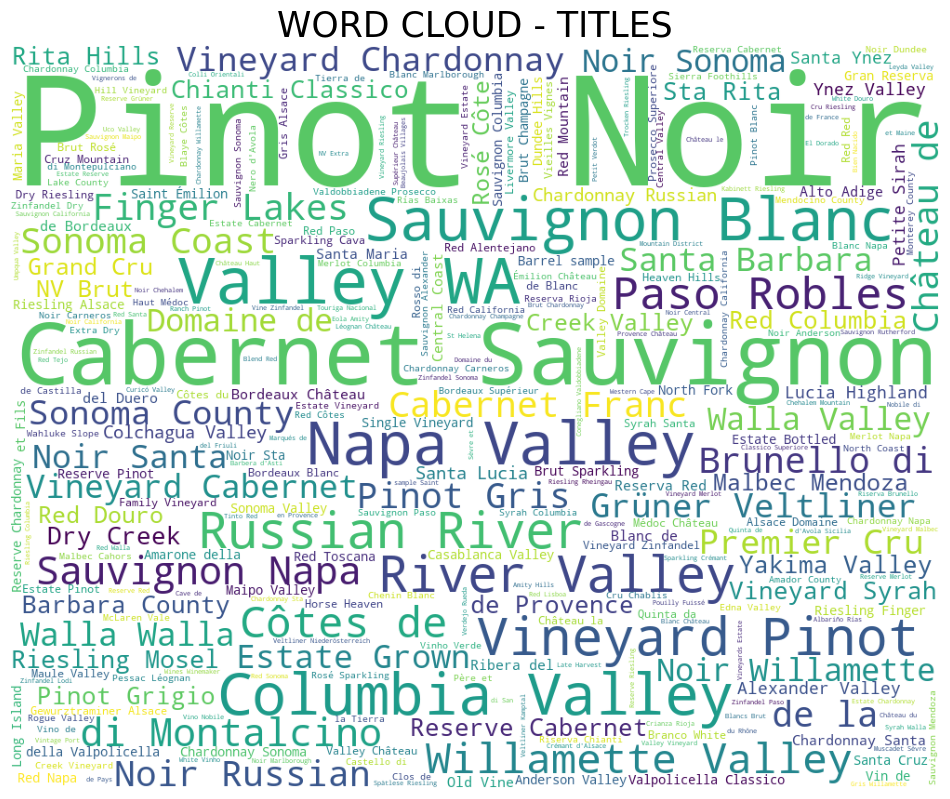

In [36]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_wine1['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

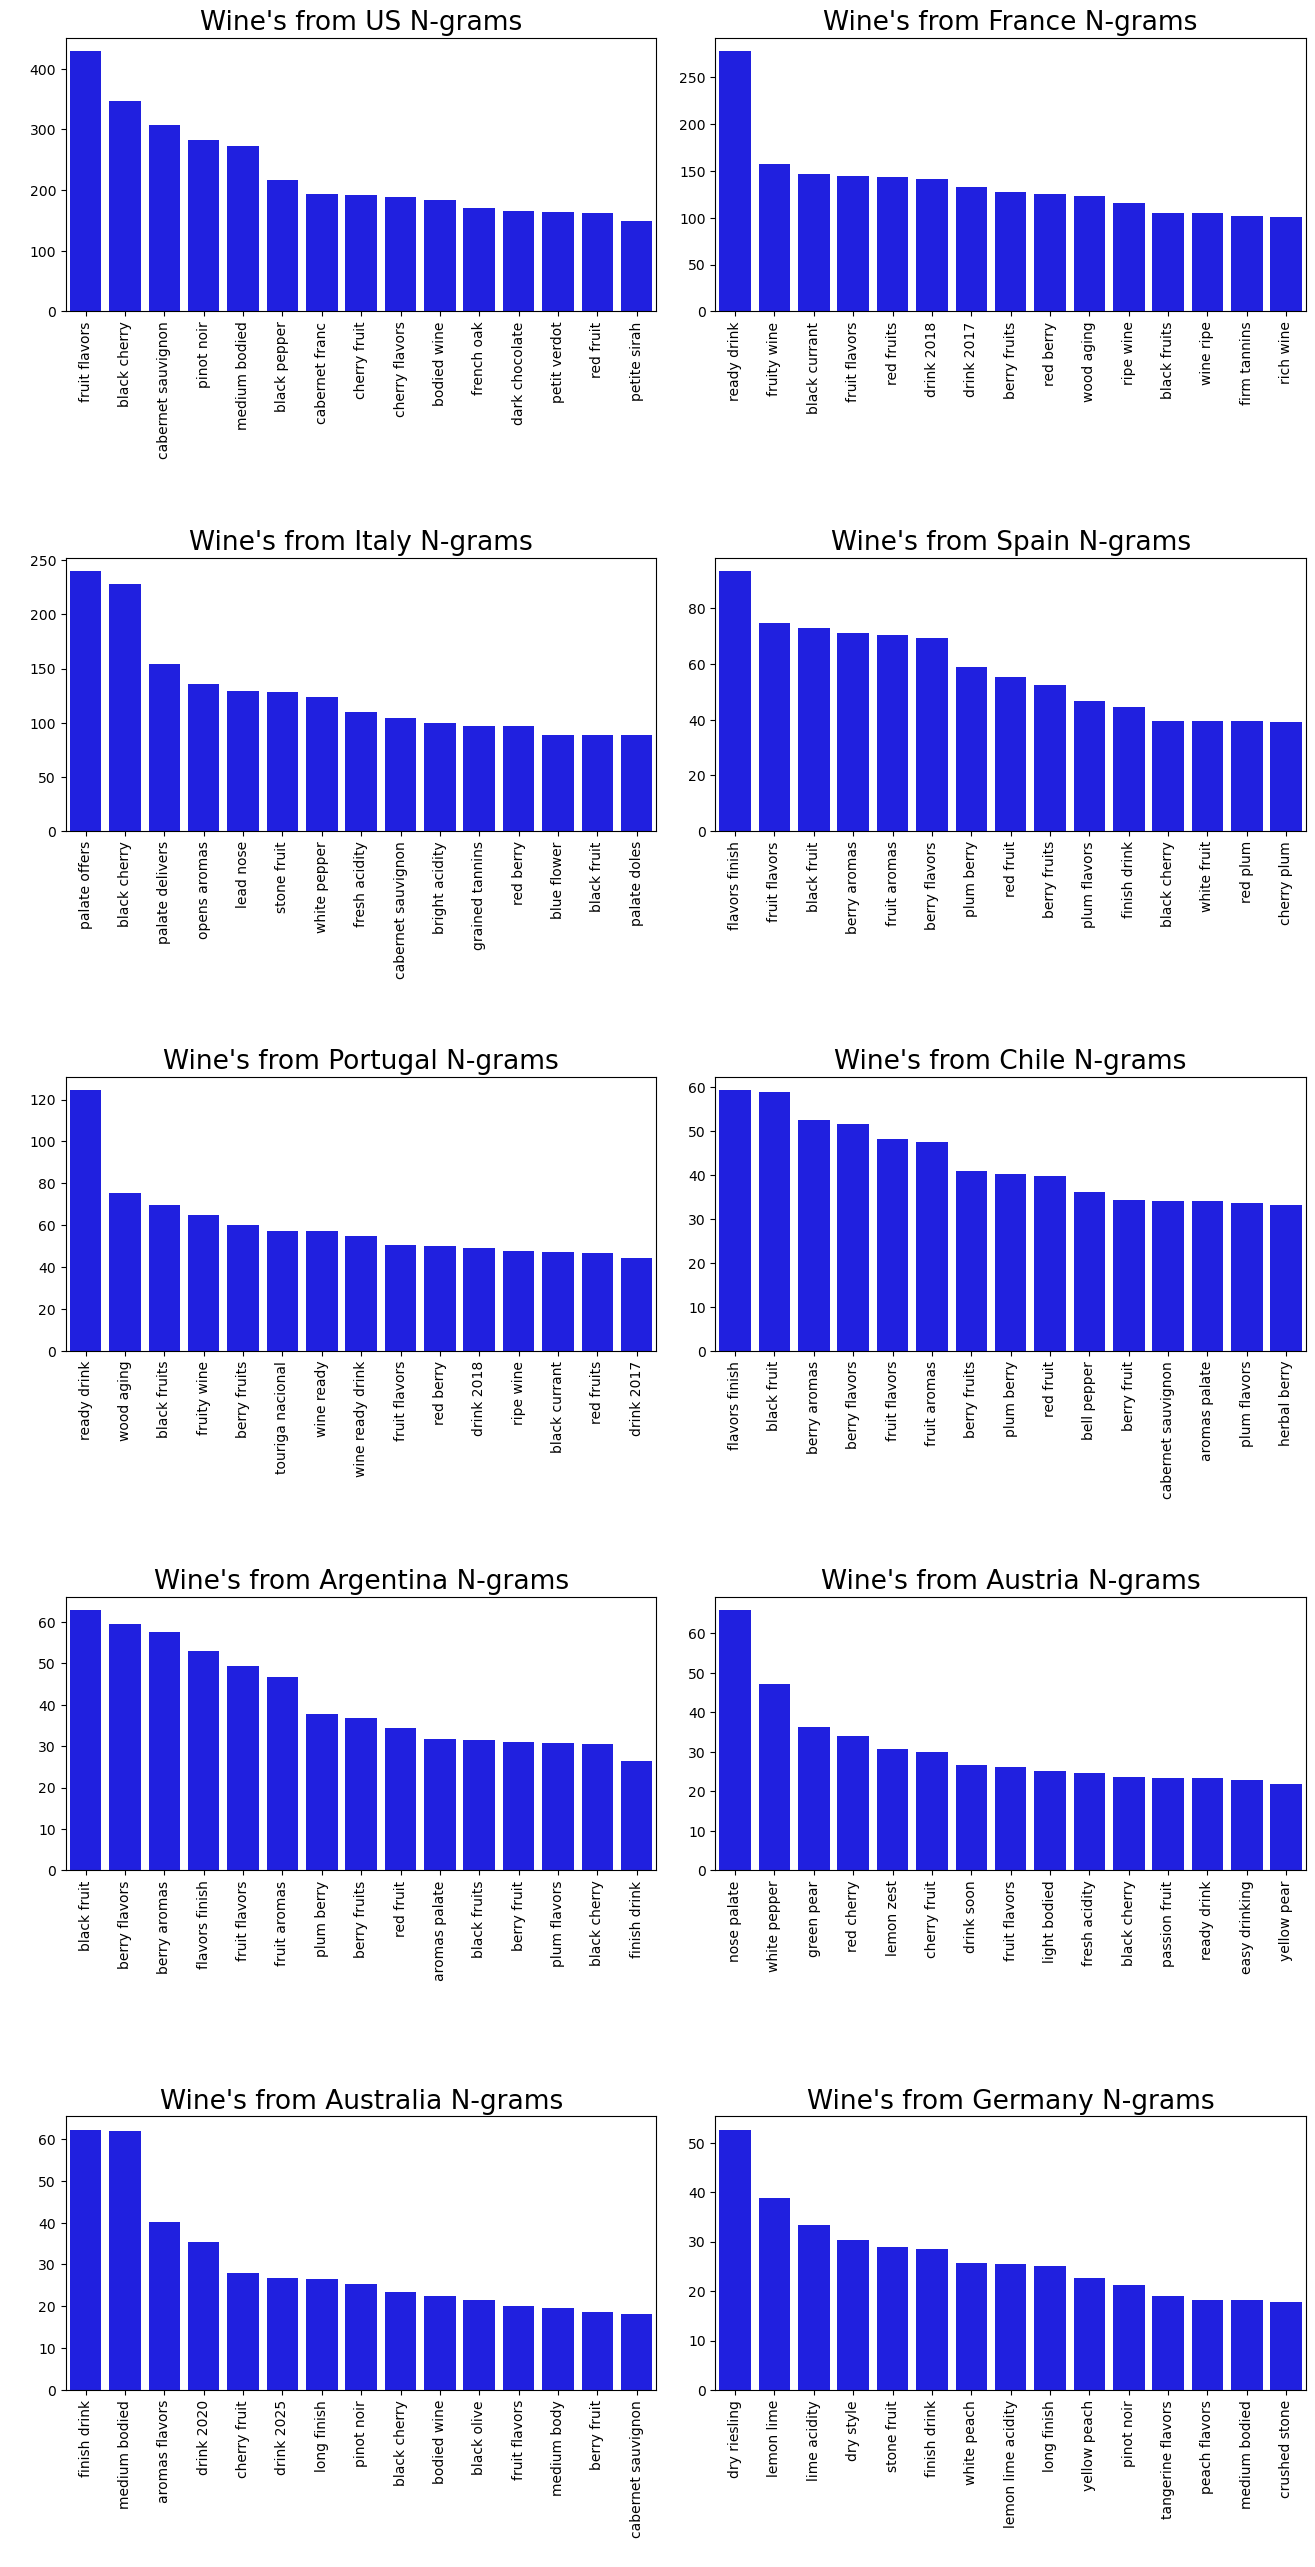

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.gridspec as gridspec

# Define the TF-IDF vectorizer outside the loop
vectorizer = TfidfVectorizer(ngram_range=(2, 3), min_df=5, stop_words='english', max_df=0.5)

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16, 7*4))

for n, cat in enumerate(country.index[:10]):
    ax = plt.subplot(grid[n])
    
    # Fit and transform the data for the current category
    X2 = vectorizer.fit_transform(df_wine1.loc[df_wine1.country == cat]['description'])
    
    # Get feature names
    features = vectorizer.get_feature_names_out()
    
    # Calculate sums of TF-IDF scores for each feature
    sums = X2.sum(axis=0)
    data1 = [(term, sums[0, col]) for col, term in enumerate(features)]
    
    # Create a DataFrame for ranking
    ranking = pd.DataFrame(data1, columns=['term', 'rank'])
    
    # Get top-ranking features
    words = ranking.sort_values('rank', ascending=False)[:15]
    
    # Plot bar plot
    sns.barplot(x='term', y='rank', data=words, ax=ax, color='blue', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top=0.95, hspace=.9, wspace=.1)
plt.show()
